Lesson 5 - Introduction to Python - Importing Modules

## Modules - True strength / power of Python

Python <b>modules</b> (single Python file) and <b>packages</b> (directory of Python modules) are two mechanisms that facilitate modular programming.
Modular programming refers to the process of breaking a large programming task into separate, smaller subtasks or modules. There are several advantages to modularizing code in a large application:

* Simplicity
* Maintainability
* Reusability
* Scoping

### The <font color=green>import</font> Statement

Import a whole module: <br>
<font color=green>**import**</font> \<module_name\>

Import a whole module and use aliases to shorten the module names: <br> 
<font color=green>**import**</font> \<module_name\> <font color=green>**as**</font> \<alt_name\>

Import an individual objects from the module: <br> 
<font color=green>**from**</font> \<module_name\> <font color=green>**import**</font> \<name(s)\>

Import all objects from a module: <br> 
<font color=green>**from**</font> \<module_name\> <font color=green>**import**</font> *

## Create your own module and load it

A <b>module</b> is a <b>.py</b> file containing Python definitions and statements. We could create  for example, a <b>module.py</b> containing the code:

In [1]:
pi = 3.14159

def area(radius):
    
    """
    Takes the radius of a circle and calculates the area of the circle.
    
    args:
    radius: float value or integer
    
    retuns: 
    area: float value that is the area of the cirucle

    """
    area = pi*(radius**2)
    return area

def circumferance(radius):
    
    """
    Takes the radius of a circle and calculates the circumferance of the circle.
    
    args:
    radius: float value or integer
    
    retuns: 
    circumferance: float value that is the circumferance of the cirucle

    """
    circumferance = 2*pi*radius
    return circumferance


def sphere_surface_area(radius):
    
    """
    Takes the radius of a sphere and calculates the surface area.
    
    args:
    radius: float value or integer
    
    retuns: 
    surface_area: float value that is the circumferance of the cirucle

    """
    surface_area = 4.0*area(radius)
    return surface_area

def sphere_volume(radius):
    
    """
    Takes the radius of a sphere and calculates the volume.
    
    args:
    radius: float value or integer
    
    retuns: 
    volume: float value that is the volume of the cirucle

    """
    volume = (4.0/3.0)*pi*(radius**3)
    
    return volume

Write the function in a text editor and save it as a py file. Then import your own module and then using the functions wihthin it!

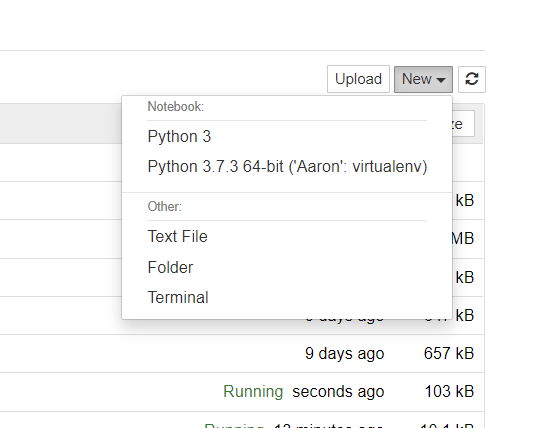

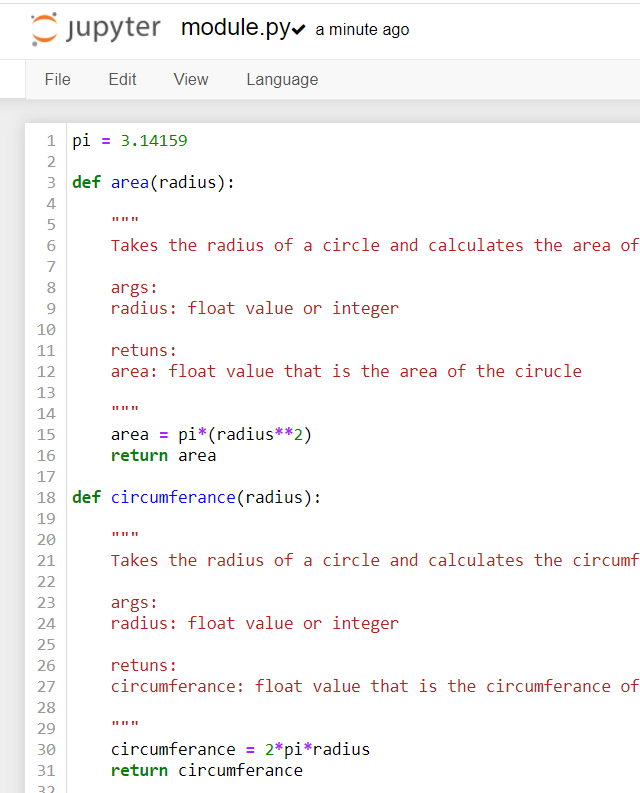

## Import the module and make the calculations

In [1]:
import Untitled as module

In [2]:
dir(module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'area',
 'circumferance',
 'pi',
 'sphere_surface_area',
 'sphere_volume']

In [3]:
module.pi

3.14159

In [4]:
import module as mod

In [5]:
a = mod.pi
a

3.14159

In [7]:
solution = mod.area(10)
solution

314.159

In [8]:
mod.circumferance(10)

62.8318

In [10]:
!pip install numpy

In [9]:
!ls

Jupyter Notebook Introduction - AIA Global's Introduction to Python.ipynb
Lesson 1 - AIA Global's Introduction to Python.ipynb
Lesson 2 - AIA Global's Introduction to Python.ipynb
Lesson 2 - Solutions.ipynb
Lesson 3 - AIA Global's Introduction to Python.ipynb
Lesson 3 - Solutions.ipynb
Lesson 4 - AIA Global's Introduction to Python.ipynb
Lesson 4 - Solutions.ipynb
Lesson 5 - AIA Global's Introduction to Python.ipynb
Lesson 5 - Solutions.ipynb
Python Installation Instructions for Upcoming Course - AIA Introduction to Python.pdf
Untitled.ipynb
Untitled.py
__pycache__
module.py
python.jpeg
stock_smoother.py


# Example of a "Real World" use case (Plotting a portfolio of stocks)

Put the following code/ functions into a .py file named <b>stock_smoother.py</b>

In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import statsmodels.api as sm   
import datetime as dt

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
import seaborn as sns

from pandas_datareader import data

def smooth_lowess(y_series, lowess_window_length = 100, smoothing_iterations = 2):
    
    """
    This is a customized LOWESS (locally weighted scatterplot smoothing) implementation that "smooths" a discrete data set.  
    In the LOWESS, each smoothed value is given by a weighted linear least squares regression over the span.  
    
    This implementation uses an upstream process to account for missing and zero values and data series that can't have negative values.  
    It also allows for a finite window length above 3, rather than a percentage of the total dataset.   
    
    It uses the statstmodels implementation:
    statsmodels.nonparametric.smoothers_lowess.lowess
    source: https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
    
    Params:
    
    y_series:  Pandas series of discrete points as the inputs variable y
    lowess_window_length:  This is the window length passed smoothed through the data set. It cannot be less than 3. 
    smoothing_iterations: number of times to iterate the smoother
    
    Returns:
    yhat: a Pandas series of the smoothed values.
    """
    
    y_series = y_series.fillna(0) # replace all NaN values with 0
    x_series = list(np.arange(0,len(y_series),1))
    
    window = lowess_window_length/len(x_series)
    
    
    lowess = sm.nonparametric.lowess
    smooth = lowess(y_series, x_series, frac = window, it = smoothing_iterations)
    index, yhat = np.transpose(smooth)
    
    return yhat

def plot_stock_trend(company, days_ago = 180, source = 'yahoo'):
    
    
    """
    Displays closing price trend of a given stock using a LOWESS smoother. 
    
    Params:
    
    company: (string) ticker symbol 
    days_ago: (integer) the number of days to look back
    source: (string) source of the financial data. 

    """
    
    #imports()
    end = pd.to_datetime("now")
    start= end - dt.timedelta(days= days_ago) 

    closing_prices = data.DataReader(company, source, start, end)['Close']
    smoothed_prices = smooth_lowess(closing_prices, lowess_window_length = 21)
    dates = closing_prices.index

    plt.style.context('ggplot')
    fig, ax = plt.subplots(figsize = (18,7), dpi = 200)

    fmt = '${x:,.0f}'
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick) 
    ax.tick_params(axis='y', labelsize = 14)
    ax.tick_params(axis='x', labelsize = 14)

    ax.set_title('\nLOWESS Smoothed Closing Prices for {}\n'.format(company), fontsize = 25)
    ax.set_xlabel('\nDate\n', fontsize = 20)
    ax.set_ylabel('\nPrice\n', fontsize = 20)

    ax.scatter(dates, closing_prices, facecolors='none', edgecolors='black', linewidth = 1, s = 80, label = 'Closing Prices')
    ax.plot(dates, smoothed_prices, color = 'red', linestyle = '--', linewidth = 4, label = 'Smoother')
    ax.plot(dates, closing_prices, color = 'dodgerblue', linewidth = 1, alpha = 1, label = 'Actual')

    ax.grid(which = 'major')
    plt.legend(loc = 2, fontsize = 18)
    plt.show()


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Now import the stock_smoother code as stocks and plot a stock trend for "MSFT"

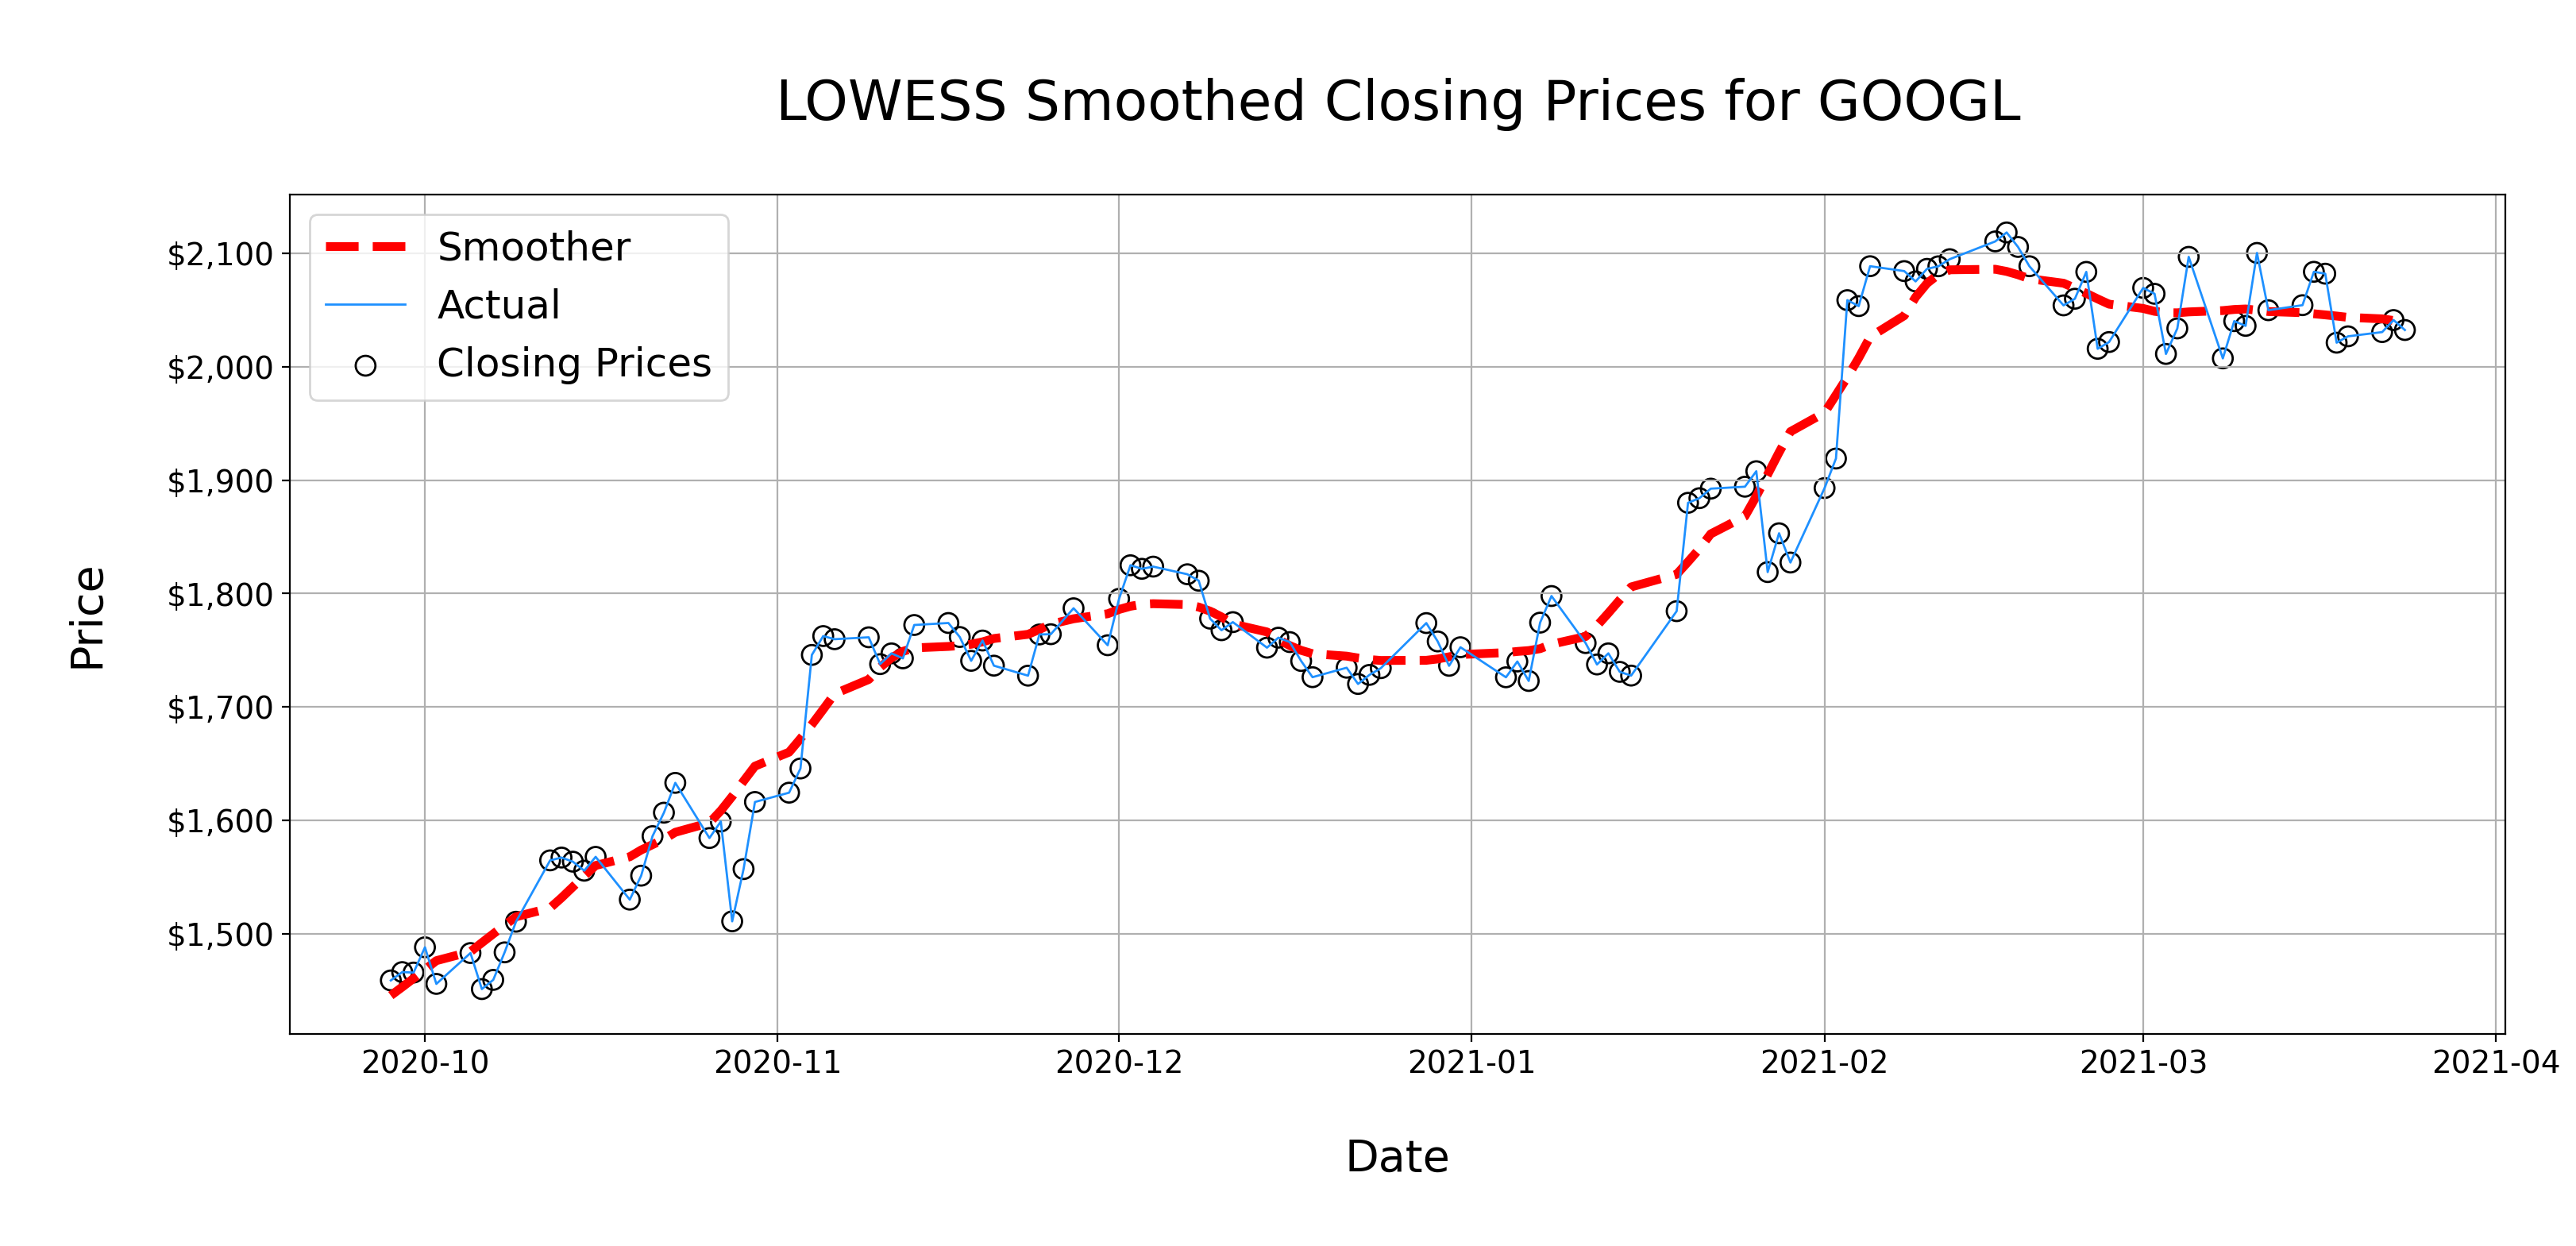

In [15]:
import stock_smoother as stocks

stocks.plot_stock_trend('GOOGL')

### Now your boss wants you to provide her/ him with a quick display showing how each of the FAANG companies are trending the past year.  (Facebook (FB),  Amazon (AMZN), Apple (AAPL), Netflix (NFLX), Google (GOOGL)

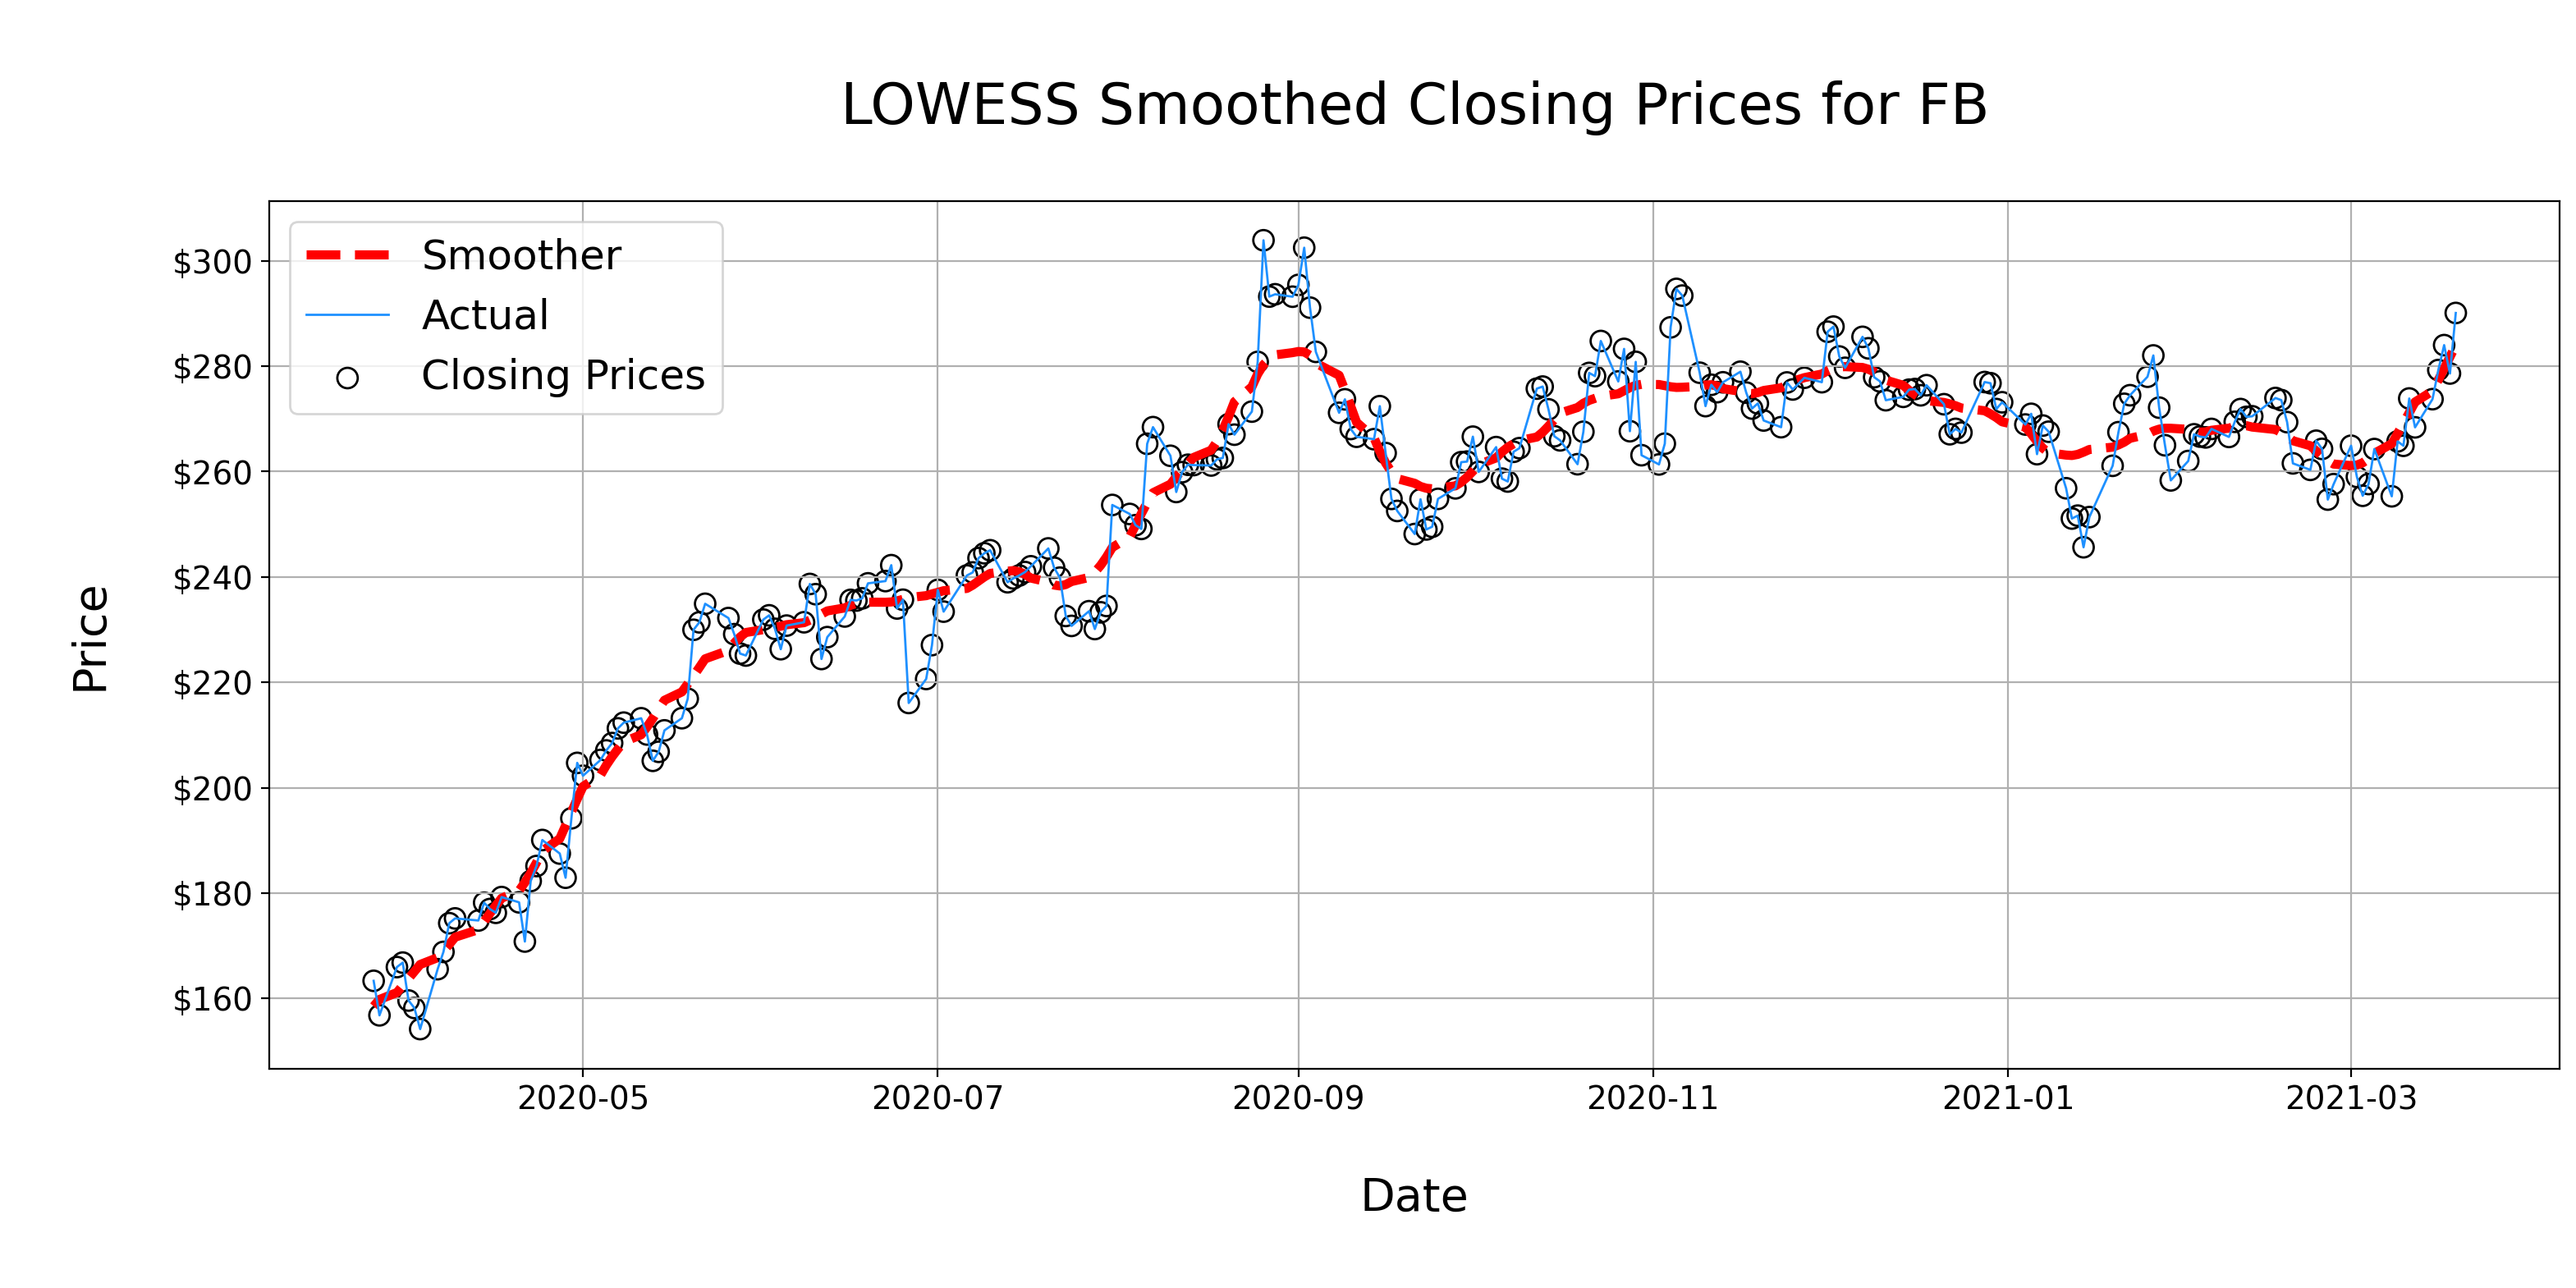

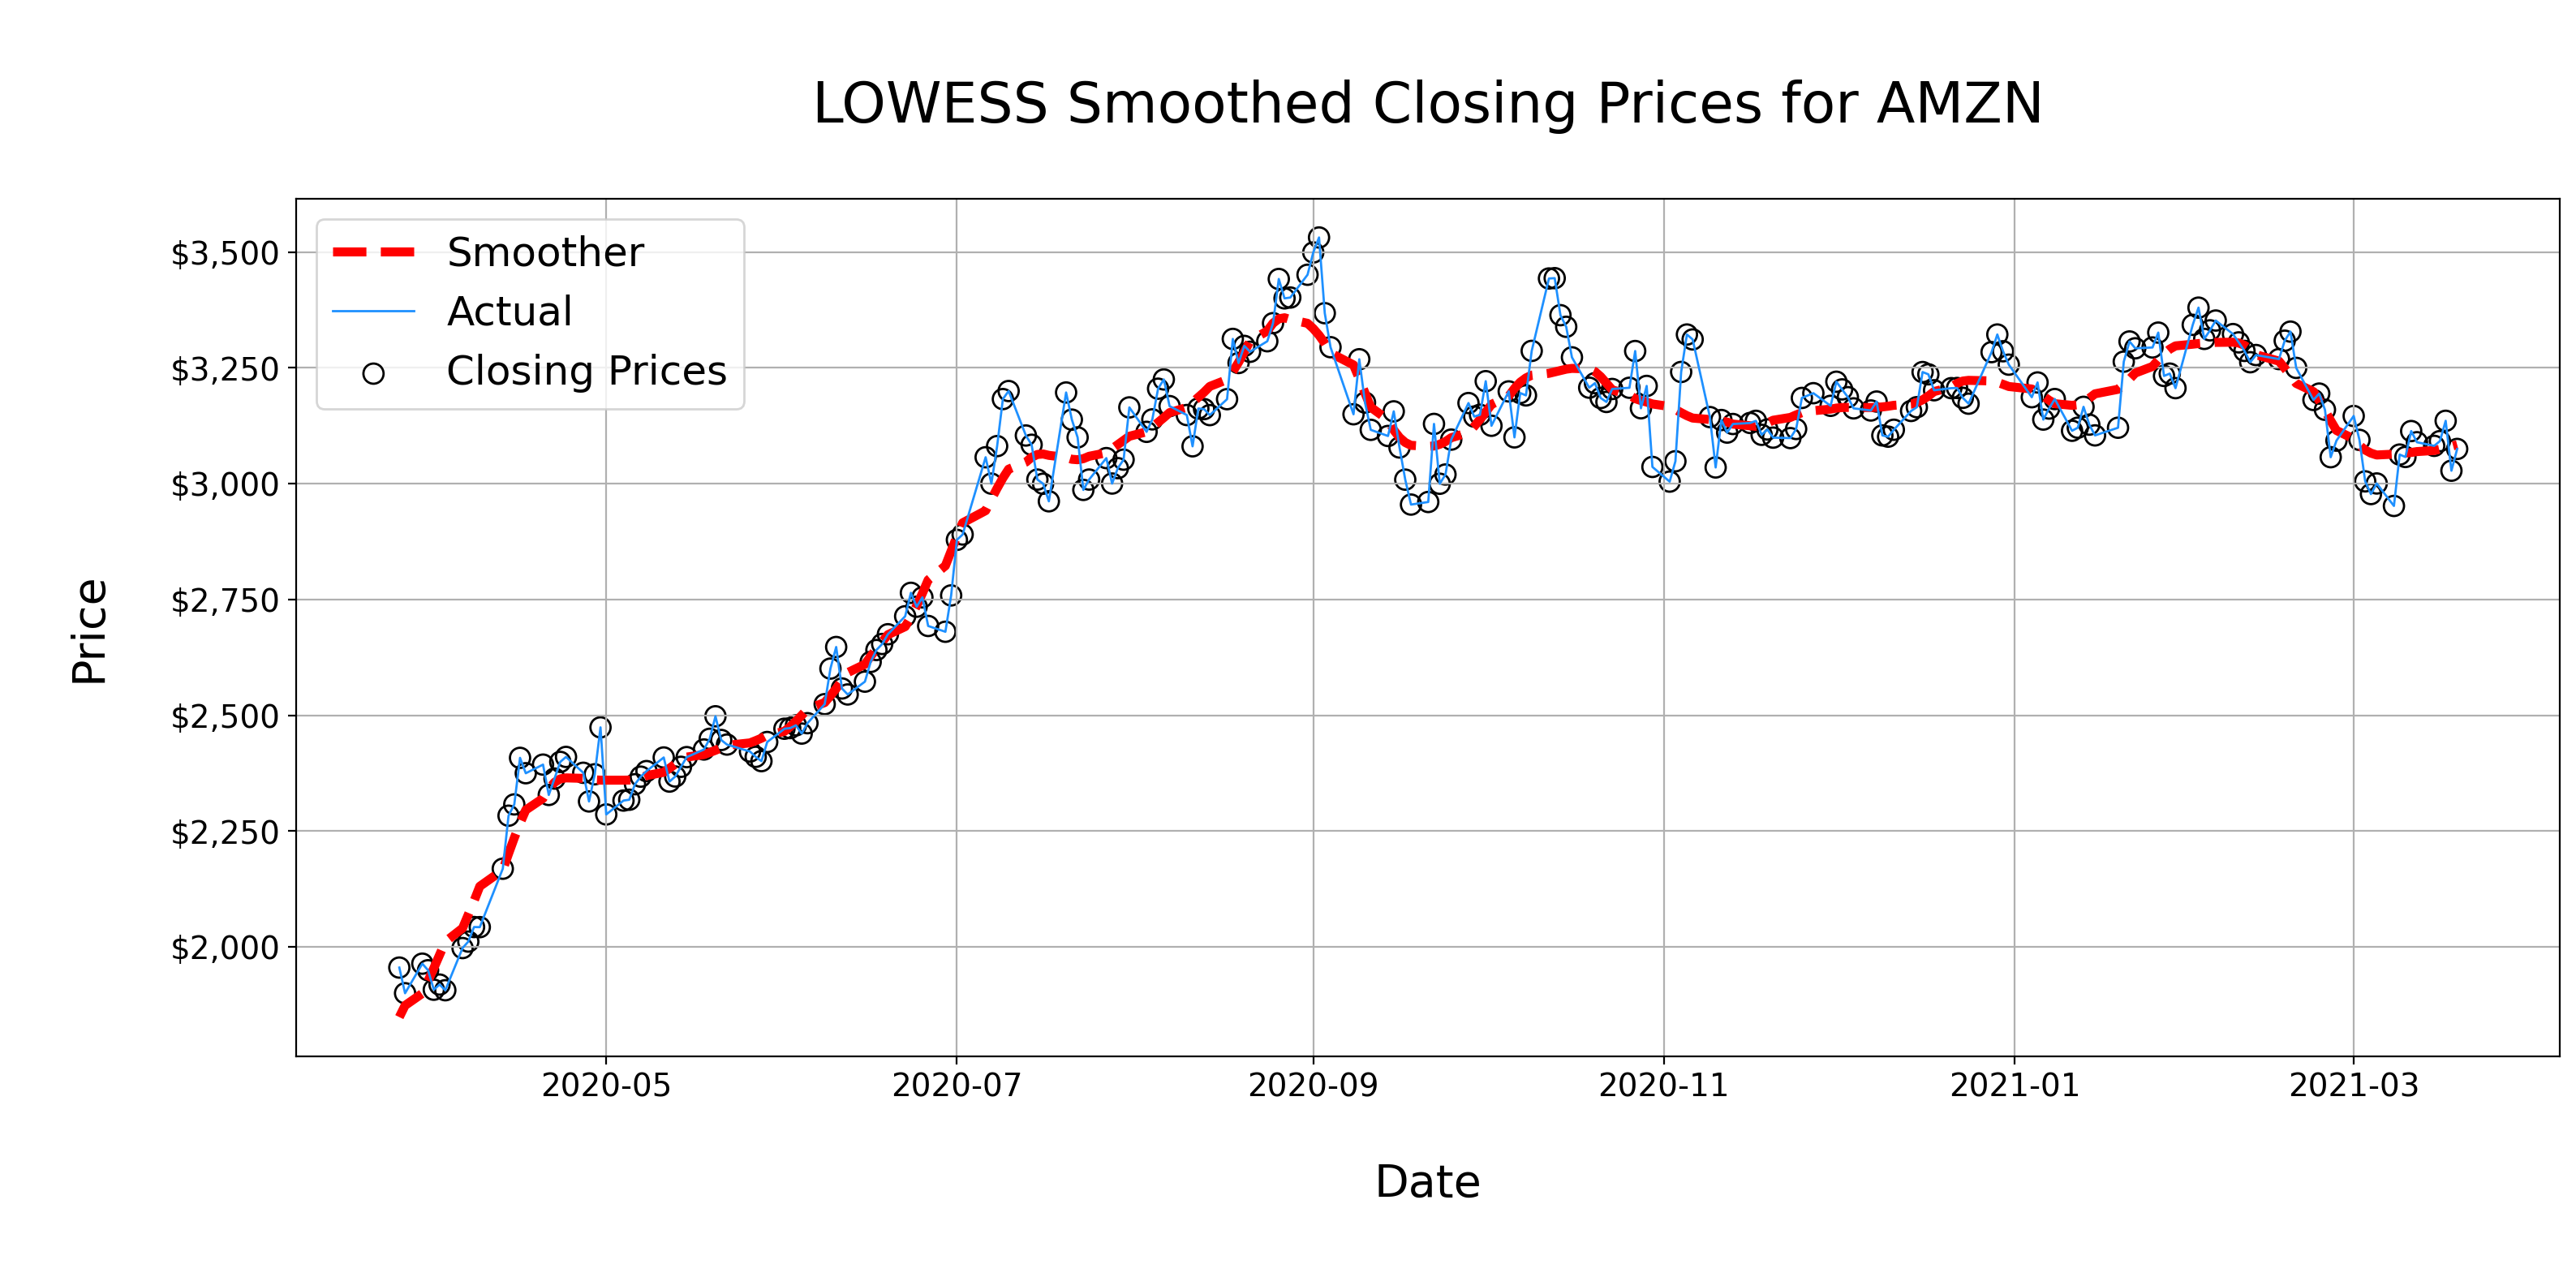

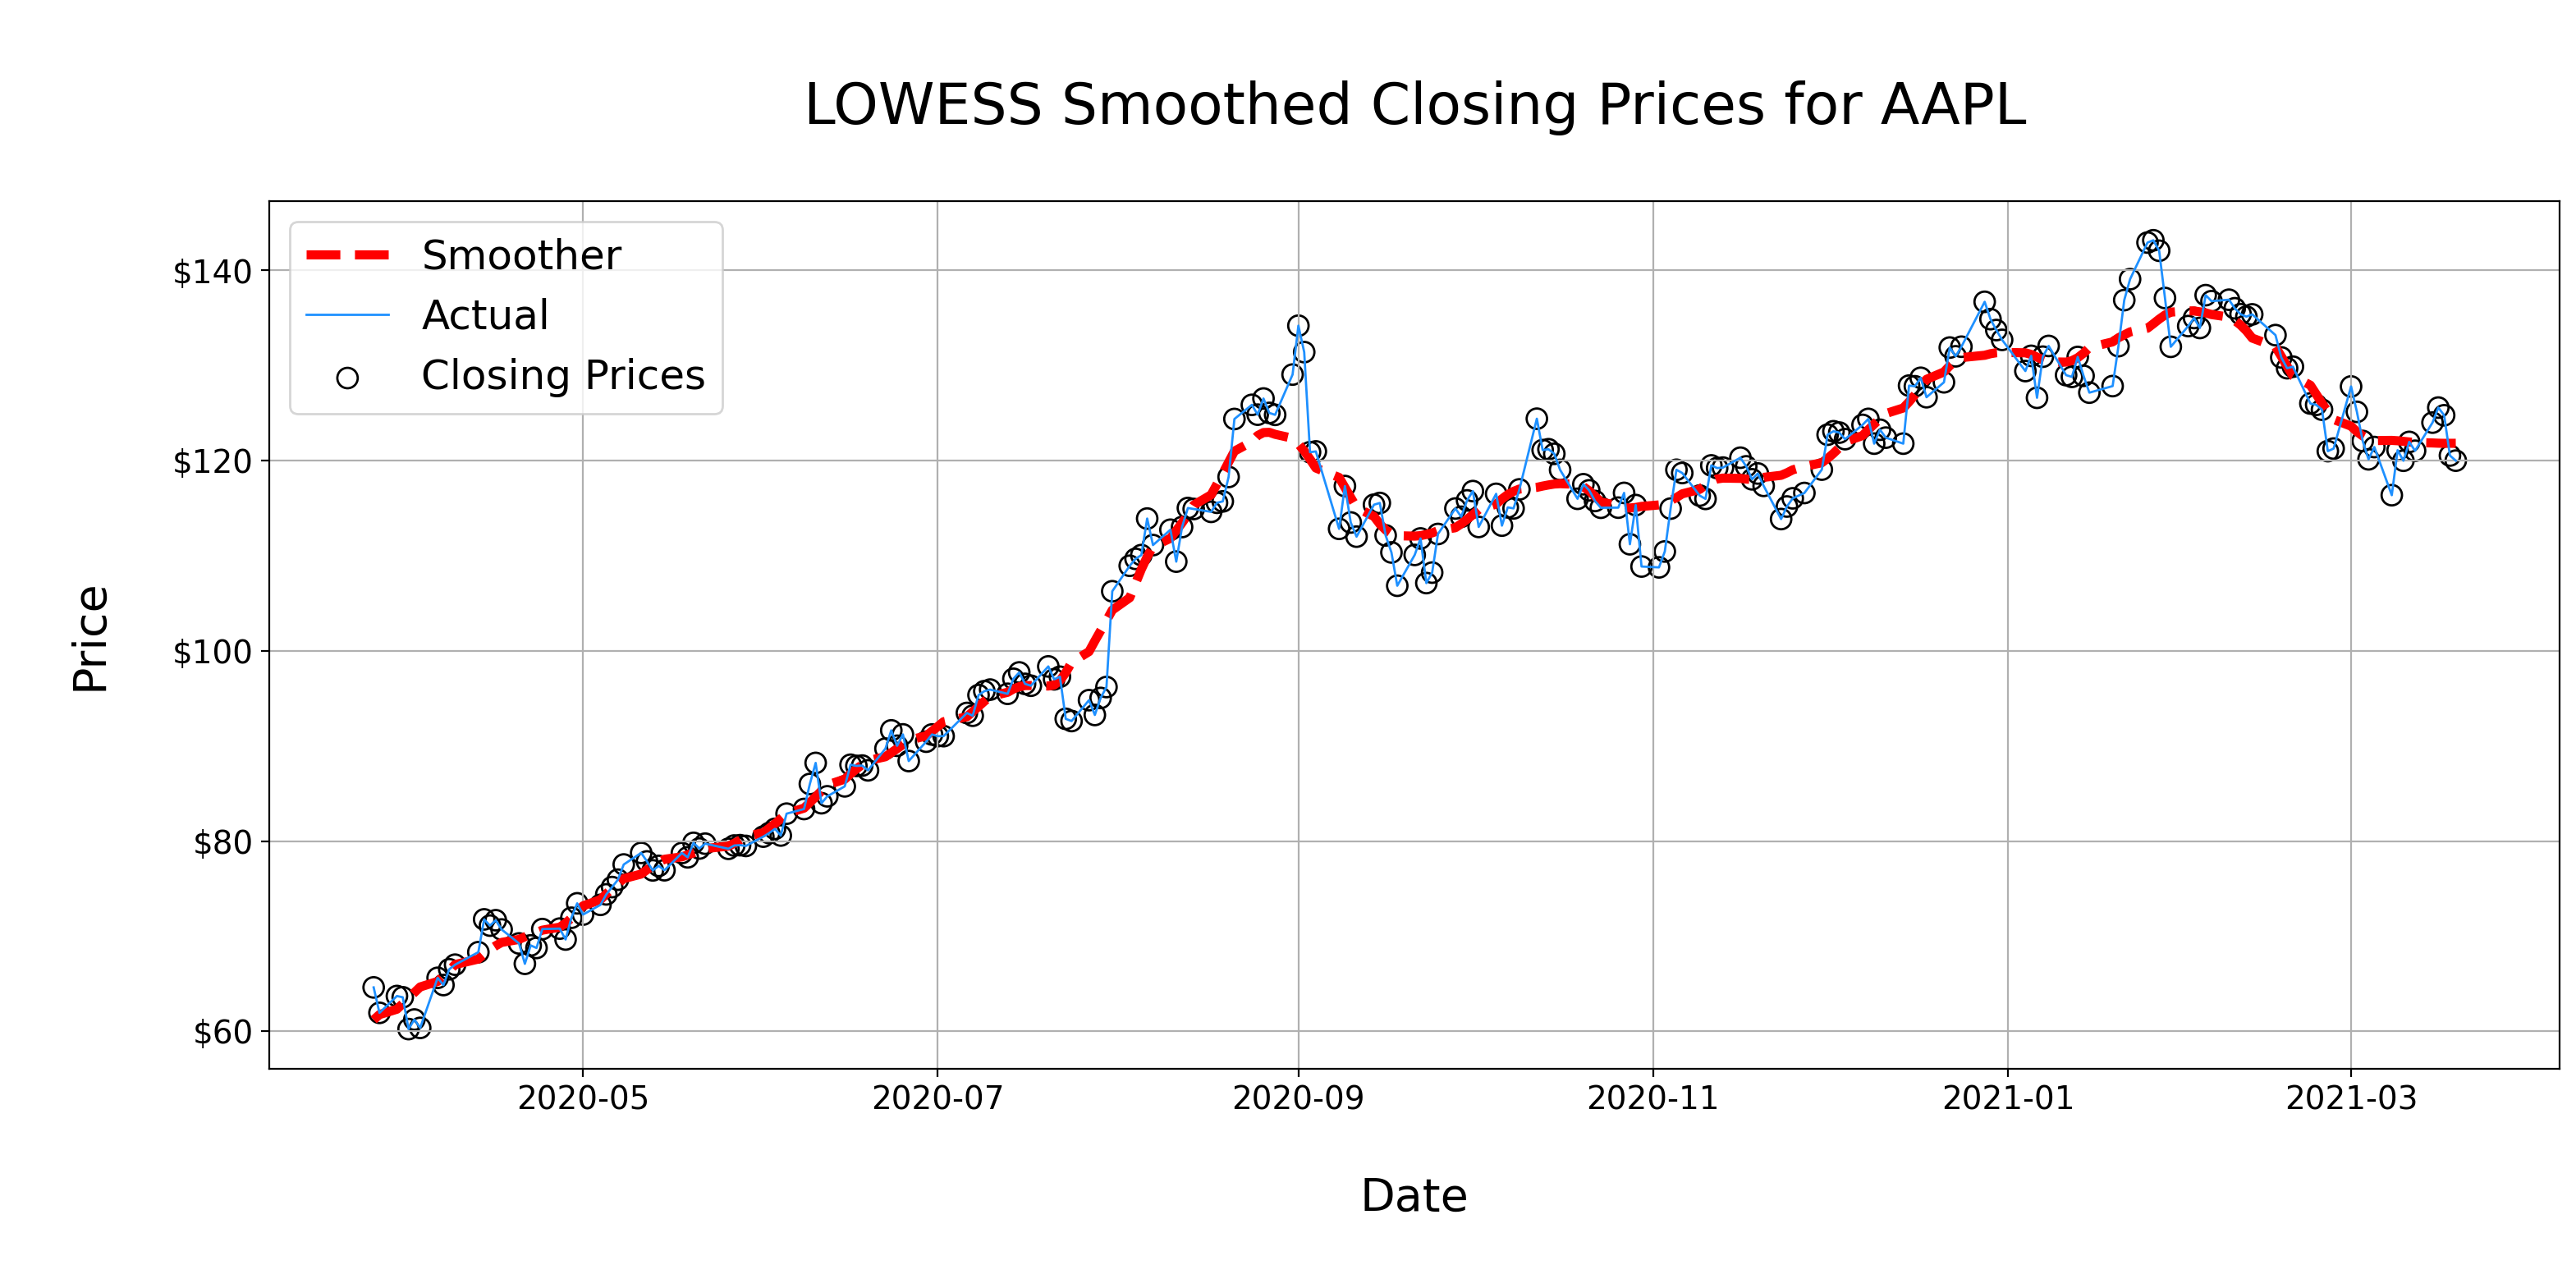

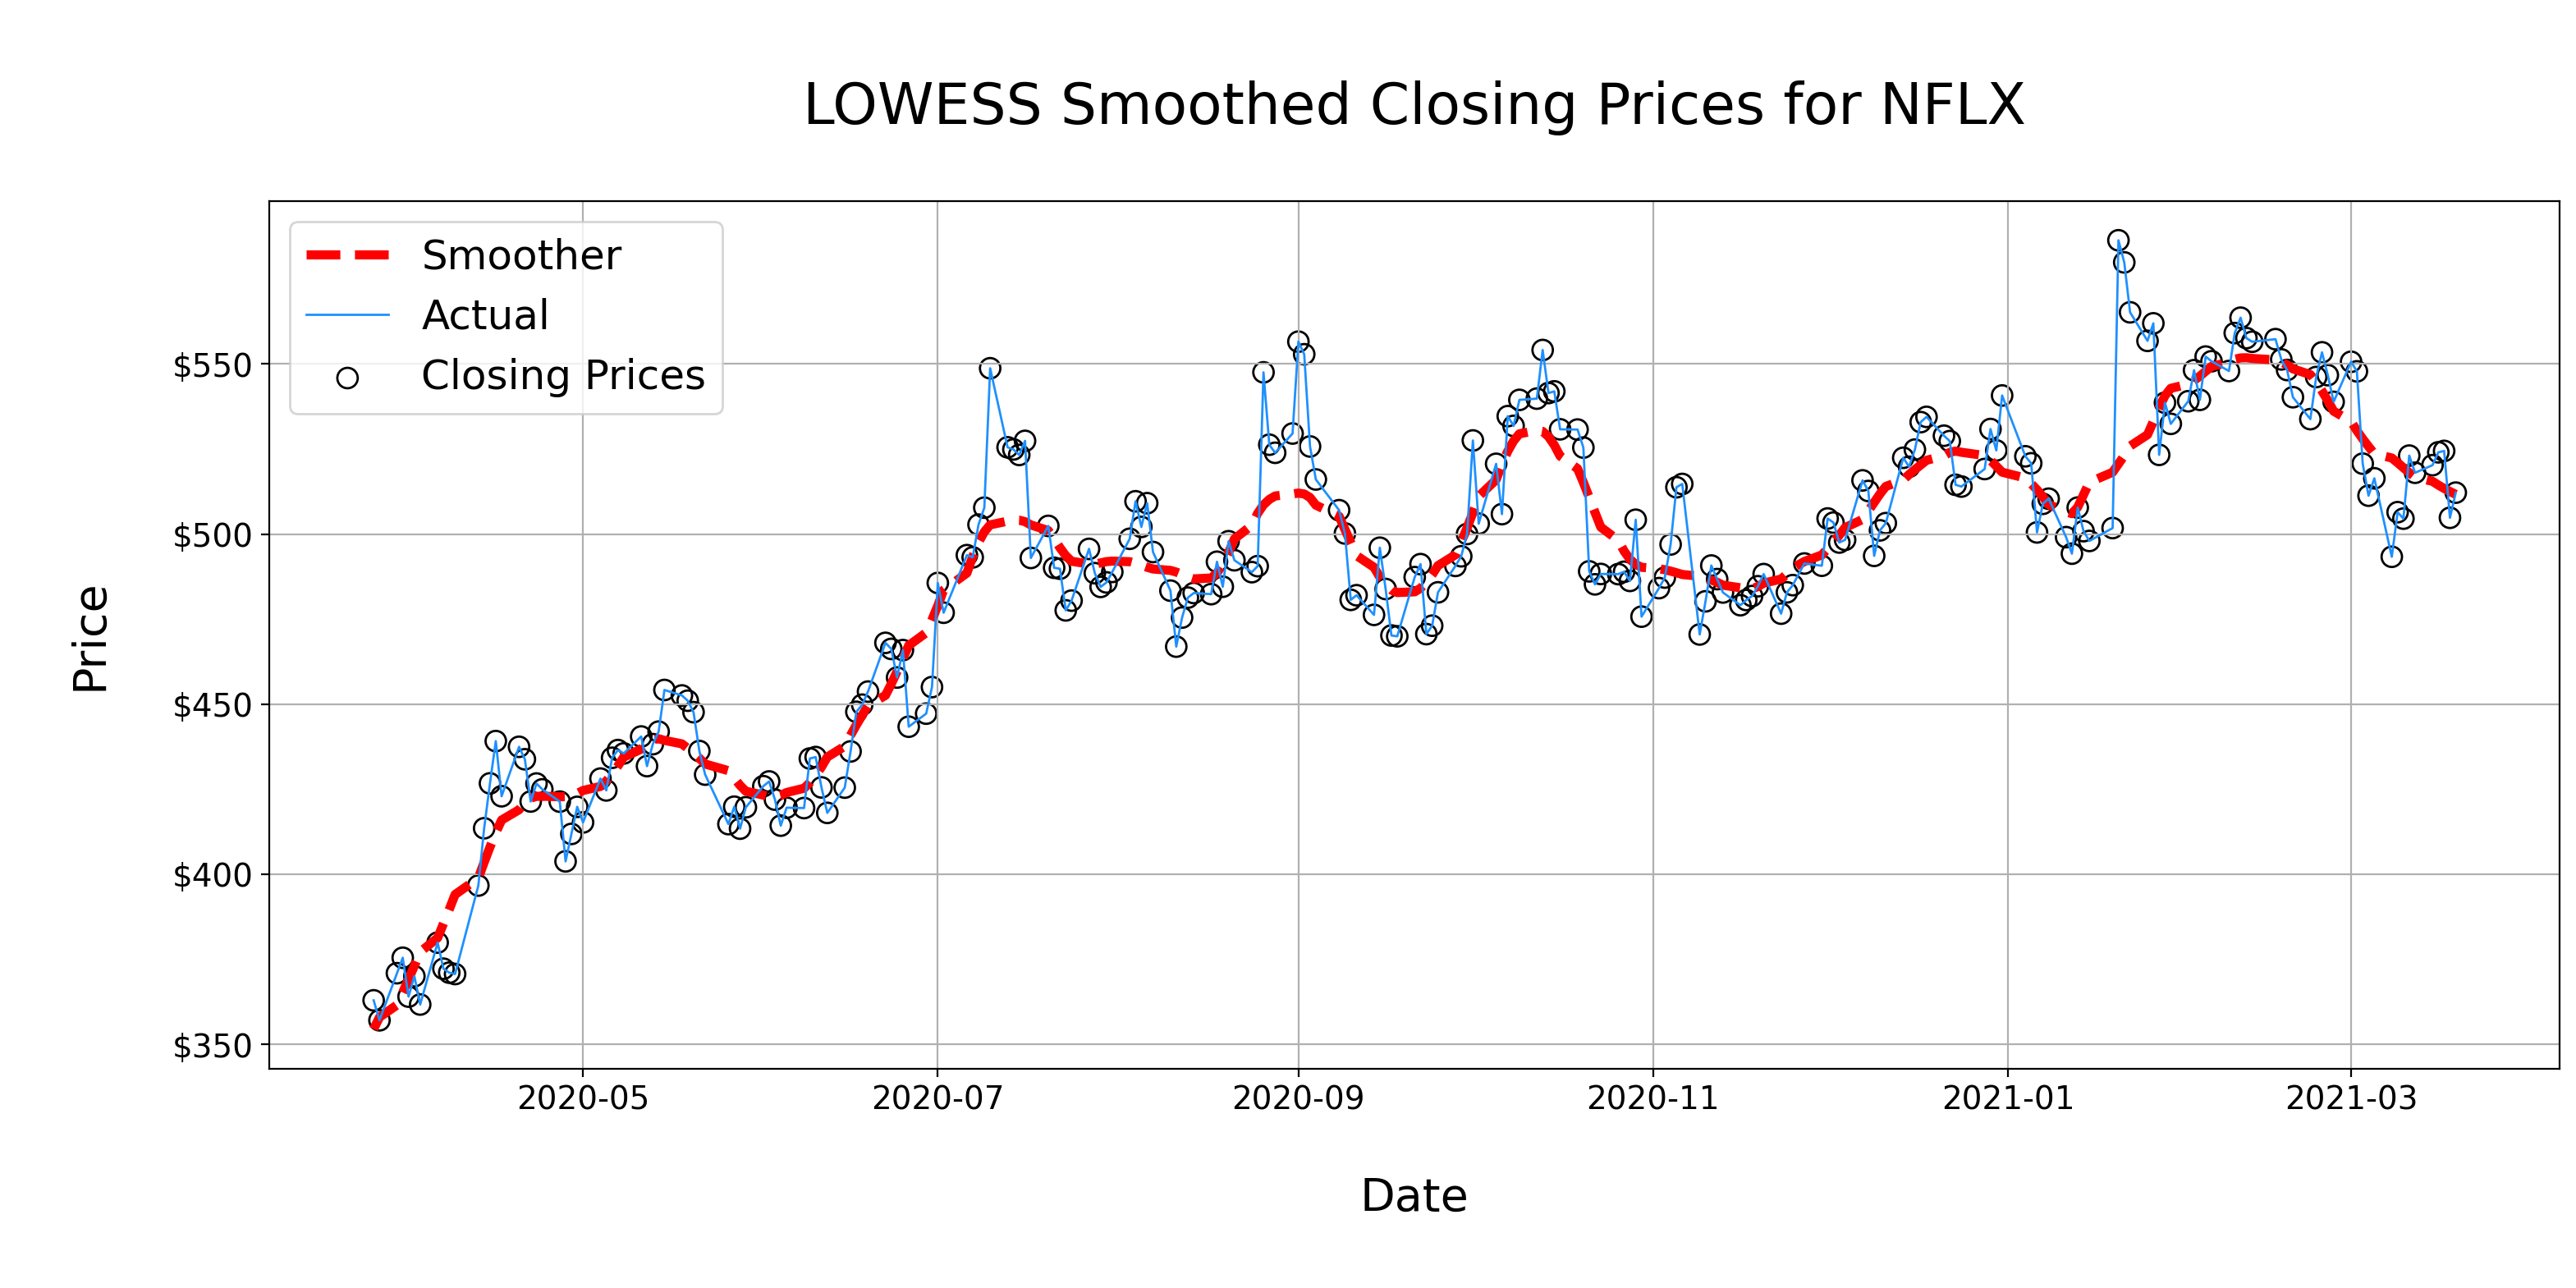

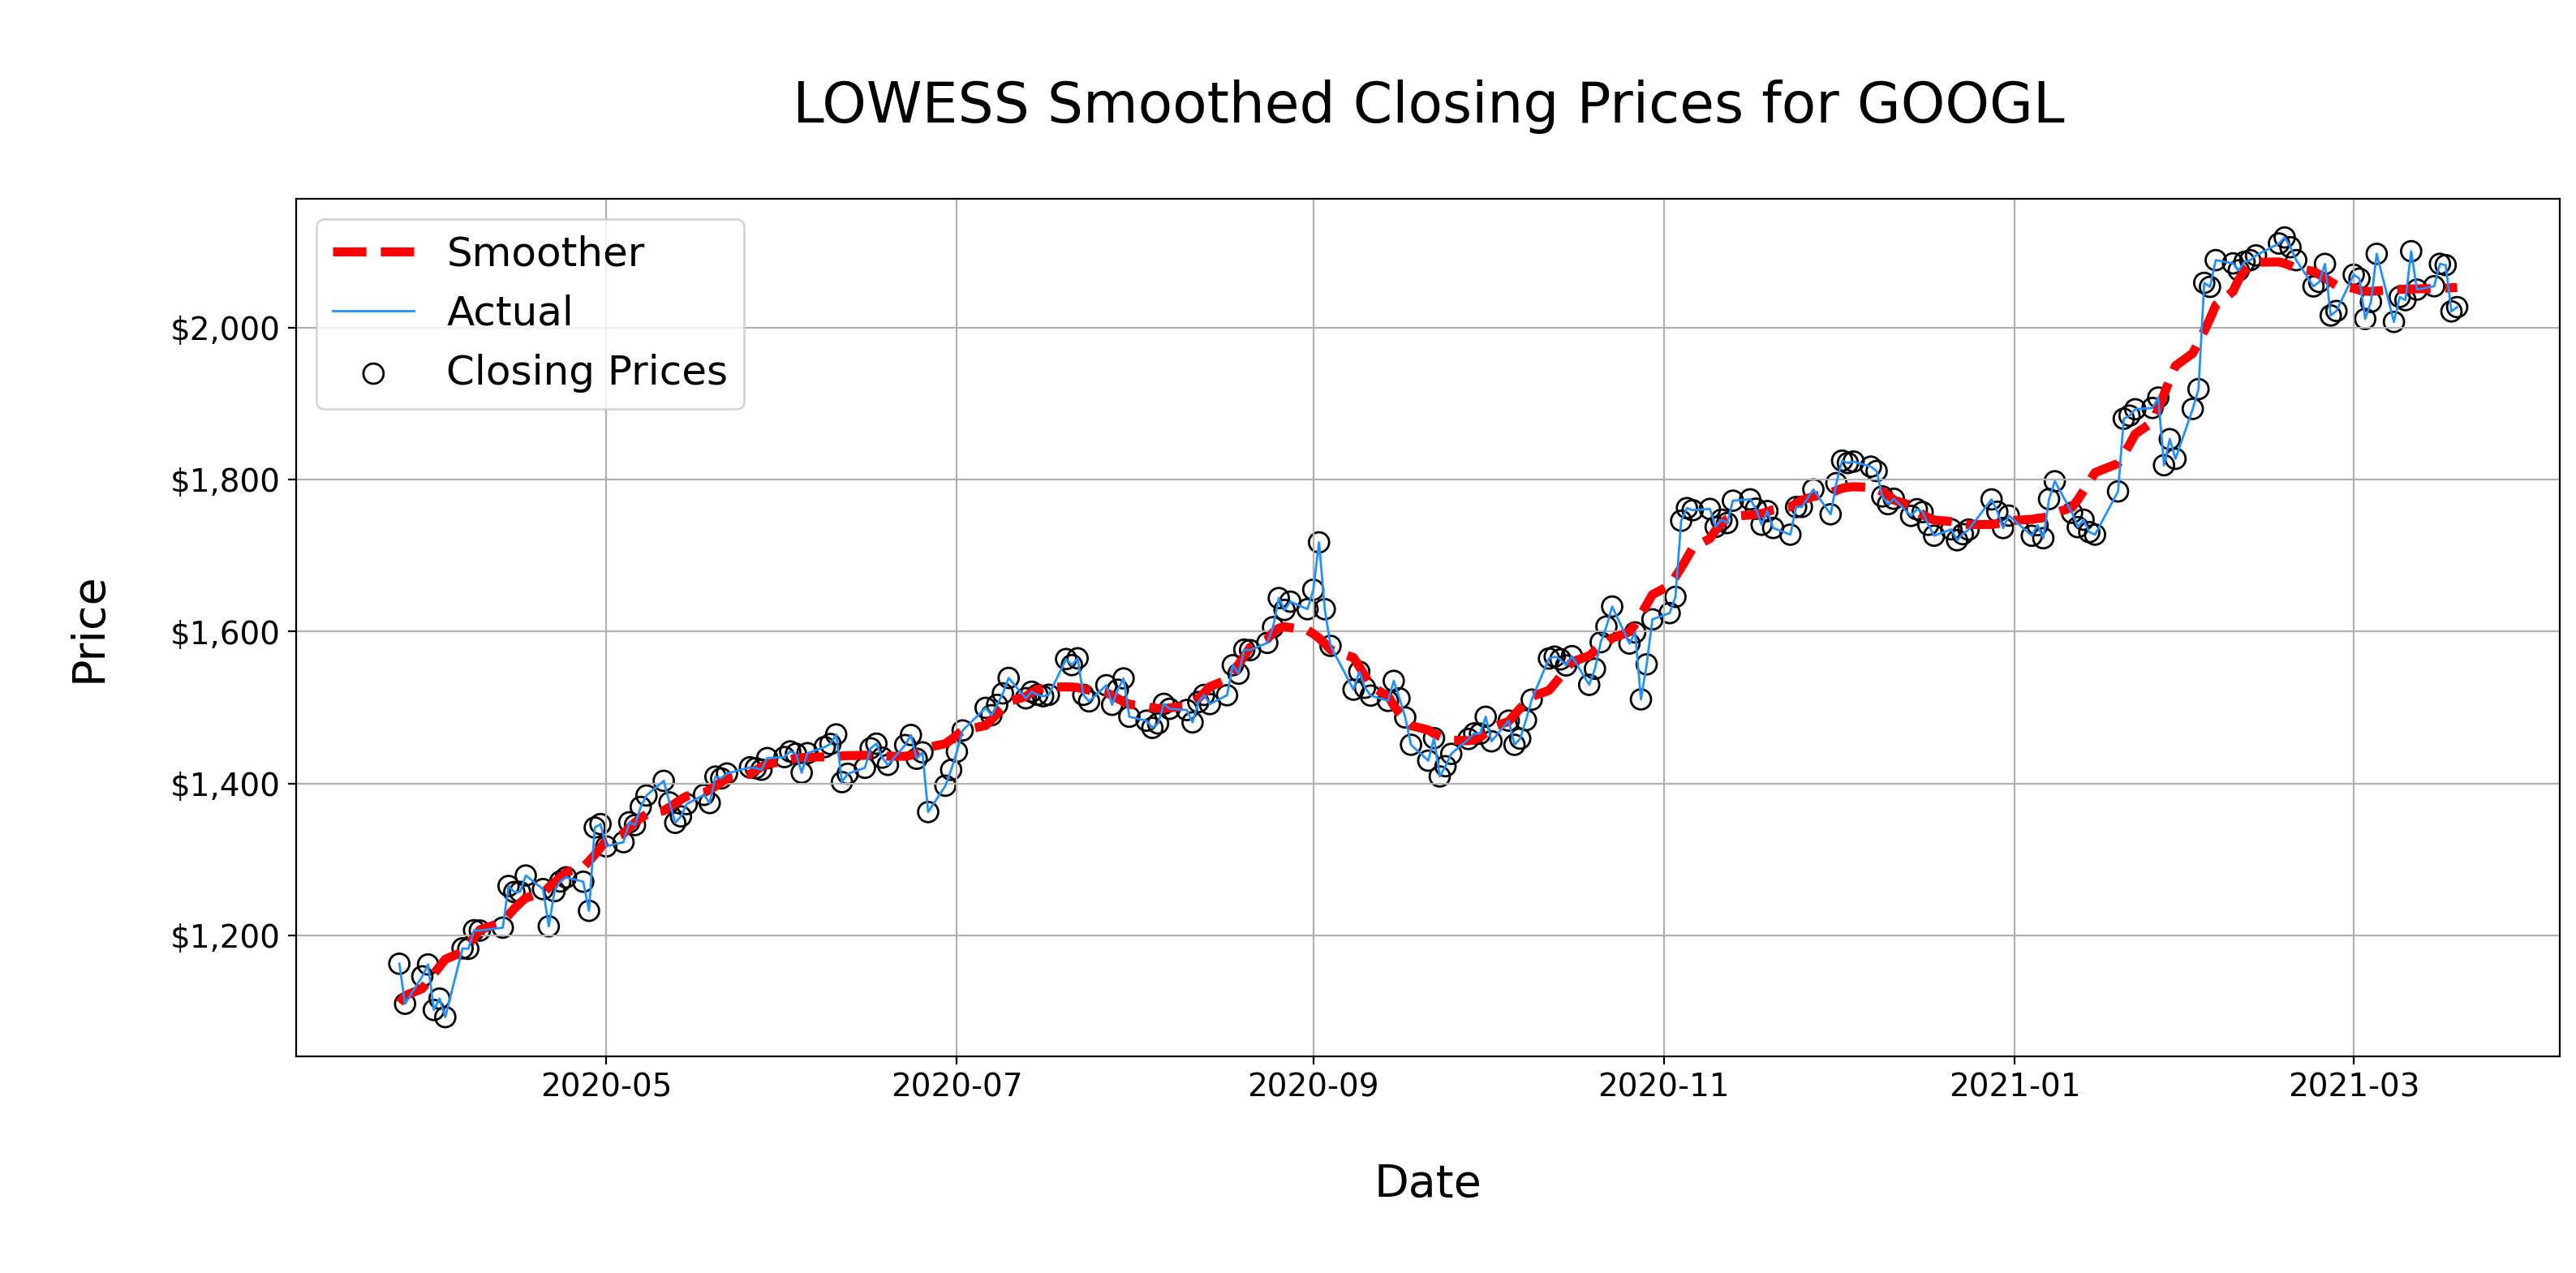

In [8]:
# put them into a list and plot them. 

ticker_list = ['FB','AMZN','AAPL','NFLX','GOOGL']

for ticker in ticker_list:
    
    stocks.plot_stock_trend(ticker, days_ago = 360)

## Import module example: load math module and use its objects

In [9]:
import math

#load pi
pi = math.pi

print(pi)

3.141592653589793


In [10]:
#rounding up to integer
math.ceil(1.2)

2

In [11]:
#rounding down to integer
math.floor(1.2)

1

In [12]:
#define angle in radians
theta = pi/3

#use sine and cosine functions defined in math module
print(f'sin(theta) = {math.sin(theta):.3f}, cos(theta) = {math.cos(theta):.2f}')

sin(theta) = 0.866, cos(theta) = 0.50


In [13]:
#import logarithm and exponential functions from math module
from math import log, exp

print(exp(2), log(exp(2)))

7.38905609893065 2.0


In [14]:
#import radians functions from math module and alias it to rad
from math import radians as rad

#angle in deg
theta = 180

#convert angle theta to radians
theta_rad = rad(theta)

print(f'Angle theta is {theta} deg or {theta_rad:.3f} radians.')

Angle theta is 180 deg or 3.142 radians.


### Exercise #1: calculate factorial of an integer using math module

Write a Python code to calculate factorial of an integer value passed using math module. For example: factorial(3) = 6

In [15]:
# your code


### Exercise #2: calculate the greatest common divisor of two integers

Write a Python code to calculate the greatest common divisor of two integers using math module. For example: gcd(24,32) = 8 

In [16]:
# your code


### HOMEWORK SOLUTION: TOWERS OF HANOI SOLUTION

This should test eveything you have learned up until this point. 
[Link to the problem and an online solution](https://runestone.academy/runestone/books/published/pythonds/Recursion/TowerofHanoi.html)

The Tower of Hanoi puzzle was invented by the French mathematician Edouard Lucas in 1883. He was inspired by a legend that tells of a Hindu temple where the puzzle was presented to young priests. At the beginning of time, the priests were given three poles and a stack of 64 gold disks, each disk a little smaller than the one beneath it. Their assignment was to transfer all 64 disks from one of the three poles to another, with two important constraints. They could only move one disk at a time, and they could never place a larger disk on top of a smaller one. The priests worked very efficiently, day and night, moving one disk every second. When they finished their work, the legend said, the temple would crumble into dust and the world would vanish.

Although the legend is interesting, you need not worry about the world ending any time soon. The number of moves required to correctly move a tower of <b>64</b> disks is <b>(2)<sup><i>64</i></sup>−1=18,446,744,073,709,551,615.</b> At a rate of one move per second, that is <b>584,942,417,355</b> years! Clearly there is more to this puzzle than meets the eye.

Figure 1 shows an example of a configuration of disks in the middle of a move from the first peg to the third. Notice that, as the rules specify, the disks on each peg are stacked so that smaller disks are always on top of the larger disks. If you have not tried to solve this puzzle before, you should try it now. You do not need fancy disks and poles–a pile of books or pieces of paper will work.

The figure shows an example of a configuration of disks in the middle of a move from the first peg to the third. Notice that, as the rules specify, the disks on each peg are stacked so that smaller disks are always on top of the larger disks. If you have not tried to solve this puzzle before, you should try it now. You do not need fancy disks and poles–a pile of books or pieces of paper will work.

<img src='https://runestone.academy/runestone/books/published/pythonds/_images/hanoi.png'>

How do we go about solving this problem recursively? How would you go about solving this problem at all? What is our base case? Let’s think about this problem from the bottom up. Suppose you have a tower of five disks, originally on peg one. If you already knew how to move a tower of four disks to peg two, you could then easily move the bottom disk to peg three, and then move the tower of four from peg two to peg three. But what if you do not know how to move a tower of height four? Suppose that you knew how to move a tower of height three to peg three; then it would be easy to move the fourth disk to peg two and move the three from peg three on top of it. But what if you do not know how to move a tower of three? How about moving a tower of two disks to peg two and then moving the third disk to peg three, and then moving the tower of height two on top of it? But what if you still do not know how to do this? Surely you would agree that moving a single disk to peg three is easy enough, trivial you might even say. This sounds like a base case in the making.

Here is a high-level outline of how to move a tower from the starting pole, to the goal pole, using an intermediate pole:

1. Move a tower of height-1 to an intermediate pole, using the final pole.
2. Move the remaining disk to the final pole.
3. Move the tower of height-1 from the intermediate pole to the final pole using the original pole.

As long as we always obey the rule that the larger disks remain on the bottom of the stack, we can use the three steps above recursively, treating any larger disks as though they were not even there. The only thing missing from the outline above is the identification of a base case. The simplest Tower of Hanoi problem is a tower of one disk. In this case, we need move only a single disk to its final destination. A tower of one disk will be our base case. In addition, the steps outlined above move us toward the base case by reducing the height of the tower in steps 1 and 3.

### Tower of Hanoi Link to Video Solution and Picture of Video Solution

Video of Solution:  https://www.youtube.com/watch?v=YstLjLCGmgg

<img src='https://media.geeksforgeeks.org/wp-content/uploads/tower-of-hanoi.png'>


## ONE SOLUTION BELOW

In [17]:
# Recursive Python function to solve the tower of hanoi 

def tower_of_hanoi(n , from_rod, to_rod, aux_rod): 
    
    if n == 1: 
        
        print('Move disk 1 from rod',from_rod,'to rod',to_rod) 
        return
    
    tower_of_hanoi(n-1, from_rod, aux_rod, to_rod) 
    
    print ('Move disk',n,'from rod',from_rod,'to rod',to_rod) 
    
    tower_of_hanoi(n-1, aux_rod, to_rod, from_rod) 

#number of disks
n = 3

# A, B, C are the name of rods: A - source, B - auxiliary, C - destination
tower_of_hanoi(n, 'A', 'C', 'B')

Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


### Write function using recursion

In [18]:
# Python function to calculate factorial using while loop

def get_factorial(n):
    """This function takes positive integer and returns factorial"""
    
    #initiate
    i = n
    n_factorial = 1
    while i > 1:
        n_factorial *= i
        i -= 1
        
    return n_factorial

get_factorial(3)

6

In [19]:
# Python function to calculate factorial using recursion

def get_factorial_recursive(n):
    
    if n == 1:
        return n
    else:
        return n*get_factorial_recursive(n-1)
        
get_factorial_recursive(3)

6